Instalar Pandas

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

Autentificar Usuario

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Pandas

In [ ]:
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
import numpy as np

In [ ]:
#Abro el archivo de datos
archivo_datos = "/content/drive/My Drive/TP1 Orga de Datos 2020/Entrenamieto_ECI_2020.csv"
df = pd.read_csv(archivo_datos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df['anio'] = df['Month'].dt.year
df['mes'] = df['Month'].dt.month
df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date'])
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'])

In [ ]:
#Me quedo solo con estos 2 stages, el resto tiene muy pocos datos
df = df.loc[(df['Stage'] == 'Closed Lost' ) | (df['Stage'] == 'Closed Won'), : ]

In [ ]:
df_brands = df['Brand']
df_brands.value_counts()

None        15847
Other         607
Brand_9       140
Brand_5        48
Brand_24       38
Brand_11       34
Brand_25       24
Brand_10       22
Brand_22       20
Brand_7        17
Brand_13       17
Brand_21       17
Brand_23       10
Brand_20       10
Brand_27        5
Brand_17        5
Brand_4         4
Brand_2         4
Brand_0         4
Brand_12        3
Brand_16        2
Brand_6         1
Brand_3         1
Brand_26        1
Brand_1         1
Brand_19        1
Name: Brand, dtype: int64

In [ ]:
df_ptype = df['Product_Type']
df_ptype.value_counts()

None              15871
Other               515
Product_Type_3      179
Product_Type_1      142
Product_Type_0       94
Product_Type_4       73
Product_Type_2        9
Name: Product_Type, dtype: int64

Como podemos ver, la mayoria de las filas del df no tiene datos en la columna de Brand y Product_Type, por ende no se puede sacar informacion respecto a esos campos

In [ ]:
df_acount = df
df_acount['Acount_Creation_Month'] = pd.DatetimeIndex(df_acount['Account_Created_Date']).month
df_valores = df_acount.groupby(['Acount_Creation_Month']).size().reset_index(name='Cantidad_Cuentas_Creadas')
df_valores

,Acount_Creation_Month,Cantidad_Cuentas_Creadas
0,1,777
1,2,776
2,3,755
3,4,3658
4,5,769
5,6,1074
6,7,3745
7,8,812
8,9,2032
9,10,909


Text(0, 0.5, 'Cantidad De Cuentas Creadas')

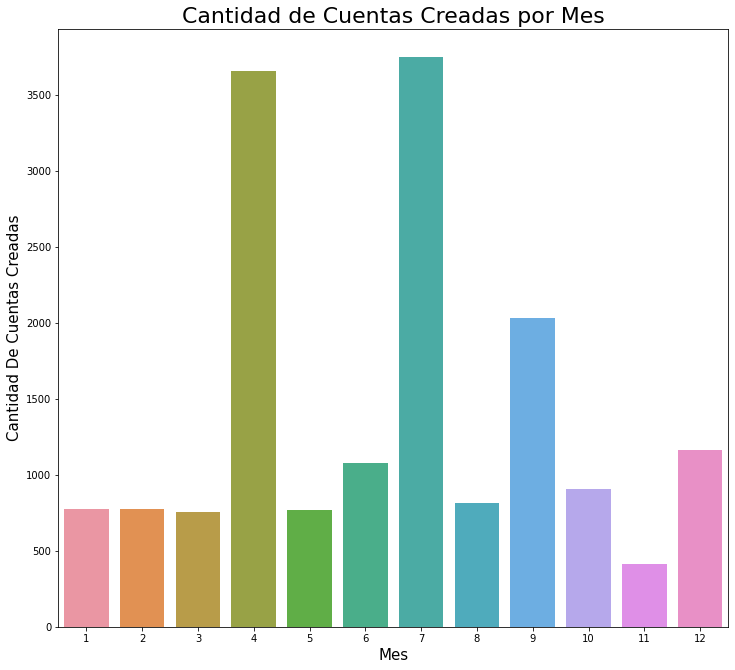

In [ ]:
fig, ax = plt.subplots(figsize = (12, 11))
plt.xticks(np.arange(0, 13, 1)) #np.arange(min, max + 1, step)
g=sns.barplot(data=df_valores, x="Acount_Creation_Month", y="Cantidad_Cuentas_Creadas", ax=ax)
g.set_title("Cantidad de Cuentas Creadas por Mes", fontsize = 22)
g.set_xlabel("Mes",fontsize=15)
g.set_ylabel("Cantidad De Cuentas Creadas", fontsize=15)

In [ ]:
df_anios = df
df_anios['Acount_Creation_Year'] = pd.DatetimeIndex(df_anios['Account_Created_Date']).year
df_val = df_anios.groupby(['Acount_Creation_Year']).size().reset_index(name='Cantidad_Cuentas_Creadas')
df_val

,Acount_Creation_Year,Cantidad_Cuentas_Creadas
0,2013,4550
1,2014,1381
2,2015,4927
3,2016,3115
4,2017,2210
5,2018,764


Text(0, 0.5, 'Cantidad De Cuentas Creadas')

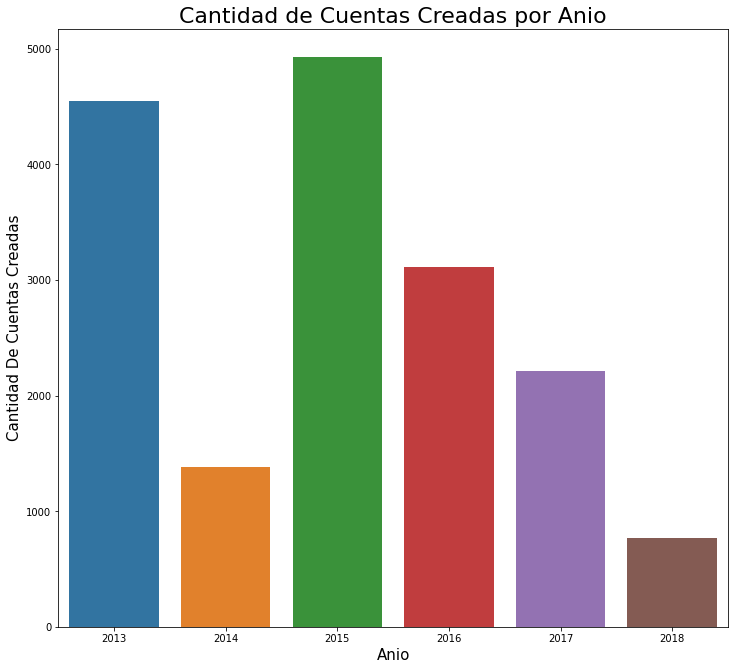

In [ ]:
fig, ax = plt.subplots(figsize = (12, 11))
#plt.xticks(np.arange(0, 13, 1)) #np.arange(min, max + 1, step)
g=sns.barplot(data=df_val, x="Acount_Creation_Year", y="Cantidad_Cuentas_Creadas", ax=ax)
g.set_title("Cantidad de Cuentas Creadas por Anio", fontsize = 22)
g.set_xlabel("Anio", fontsize=15)
g.set_ylabel("Cantidad De Cuentas Creadas", fontsize=15)

In [ ]:
df_tiempo = df[['Opportunity_Name', 'Account_Created_Date', 'Account_Name', 'Opportunity_Created_Date', 'Stage']]
#df_tiempo["Tiempo_Desde_Creacion_Hasta_Primera_Oportunidad"] = df_tiempo["Opportunity_Created_Date"] - df_tiempo["Account_Created_Date"]
df_dias = df_tiempo.groupby(['Account_Name', 'Account_Created_Date'])['Opportunity_Created_Date'].min().reset_index()
df_dias['Diff'] = df_dias['Opportunity_Created_Date'] - df_dias['Account_Created_Date']
df_dias = df_dias.drop(df_dias[df_dias['Diff'].dt.days < 0].index) #Elimino aquellas con dia de creacion menor a primera oportunidad
df_dias['Diff'] = df_dias['Diff'].dt.days
df_dias = df_dias.value_counts('Diff').reset_index()
df_dias = df_dias.rename(columns={0:'Cantidad'})
df_dias['Porcentaje'] = (df_dias['Cantidad'] / df_dias['Cantidad'].sum()) * 100
df_dias = df_dias.sort_values('Diff')
df_dias

,Diff,Cantidad,Porcentaje
0,0,1065,68.181818
1,1,23,1.472471
2,2,8,0.512164
4,3,6,0.384123
3,4,7,0.448143
...,...,...,...
256,1595,1,0.064020
257,1623,1,0.064020
258,1698,1,0.064020
315,1703,1,0.064020


Text(0, 0.5, 'Porcentaje sobre el total')

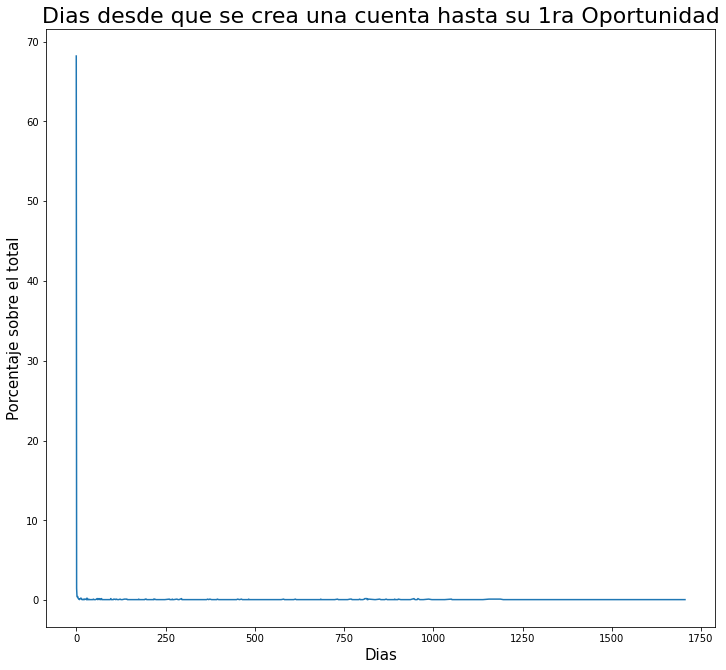

In [ ]:
fig, ax = plt.subplots(figsize = (12, 11))
g=sns.lineplot(data=df_dias, x="Diff", y="Porcentaje", ax=ax)
g.set_title("Dias desde que se crea una cuenta hasta su 1ra Oportunidad", fontsize = 22)
g.set_xlabel("Dias",fontsize=15)
g.set_ylabel("Porcentaje sobre el total", fontsize=15)

Luego de este analisis podemos ver que la mayoria de cuentas que se crean realizan su primera oportunidad ese mismo dia

In [ ]:
df_porciento = df[['Opportunity_Name', 'Account_Name', 'Stage']]
df_porciento = df_porciento.groupby(['Account_Name', 'Opportunity_Name', 'Stage']).agg(Cant=("Stage", "count")).reset_index()
df_porciento = df_porciento.drop(['Cant'], axis=1)
df_porciento["Cantidad"] = 1
#df_porciento = df_porciento.groupby(['Account_Name', 'Opportunity_Name', 'Stage']).first()
df_porciento.head(20)

,Account_Name,Opportunity_Name,Stage,Cantidad
0,Account_Name_0,Opportunity_Name_7547,Closed Won,1
1,Account_Name_1,Opportunity_Name_11763,Closed Lost,1
2,Account_Name_10,Opportunity_Name_870,Closed Lost,1
3,Account_Name_100,Opportunity_Name_2262,Closed Won,1
4,Account_Name_1000,Opportunity_Name_1582,Closed Lost,1
5,Account_Name_1001,Opportunity_Name_6198,Closed Won,1
6,Account_Name_1002,Opportunity_Name_6163,Closed Won,1
7,Account_Name_1004,Opportunity_Name_6208,Closed Lost,1
8,Account_Name_1006,Opportunity_Name_12272,Closed Lost,1
9,Account_Name_1006,Opportunity_Name_1632,Closed Lost,1


In [ ]:
df_ganadas = pd.pivot_table(df_porciento, index=['Account_Name'], columns=['Stage'], fill_value=0)
df_ganadas['Gano Mas'] = df_ganadas['Cantidad']['Closed Lost'] <= df_ganadas['Cantidad']['Closed Won']
df_ganadas['Gano Mas'] = df_ganadas['Gano Mas'].astype(int)
total = df_ganadas['Gano Mas'].size
ganadoras = df_ganadas['Gano Mas'].sum()
porcentaje = (ganadoras / total) * 100
df_porcentaje_cuentas_ganadoras = pd.DataFrame({'Porcentaje': [porcentaje, 100-porcentaje], 'Indice': ['Mas Ganadas', 'Mas Perdidas']})
df_porcentaje_cuentas_ganadoras = df_porcentaje_cuentas_ganadoras.set_index('Indice')
df_porcentaje_cuentas_ganadoras

,Porcentaje
Indice,
Mas Ganadas,41.17284
Mas Perdidas,58.82716


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


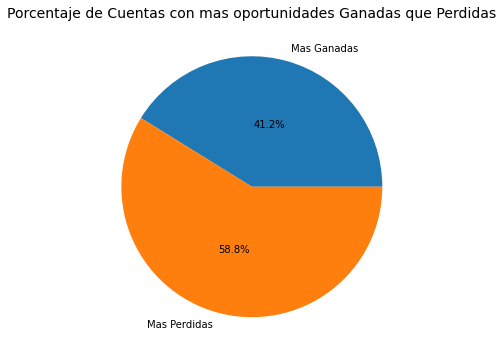

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
label = df_porcentaje_cuentas_ganadoras.index
plt.pie(x=df_porcentaje_cuentas_ganadoras, autopct="%.1f%%", labels=label, pctdistance=0.5)
plt.title("Porcentaje de Cuentas con mas oportunidades Ganadas que Perdidas", fontsize=14);

In [ ]:
df_source = df[['Stage', 'Source ', 'Opportunity_Name']]
df_source = df_source.drop(df_source[df_source['Source ']=='None'].index) #Borro los que decian None
df_source = df_source.groupby(['Source ', 'Stage']).agg(cant=('Stage', 'size')).reset_index()
df_source

,Source,Stage,cant
0,Source_0,Closed Lost,7
1,Source_1,Closed Lost,89
2,Source_1,Closed Won,48
3,Source_10,Closed Lost,70
4,Source_10,Closed Won,36
5,Source_11,Closed Lost,505
6,Source_11,Closed Won,916
7,Source_12,Closed Lost,2
8,Source_13,Closed Lost,196
9,Source_13,Closed Won,587


Text(0, 0.5, 'Cantidad de oportunidades por Source')

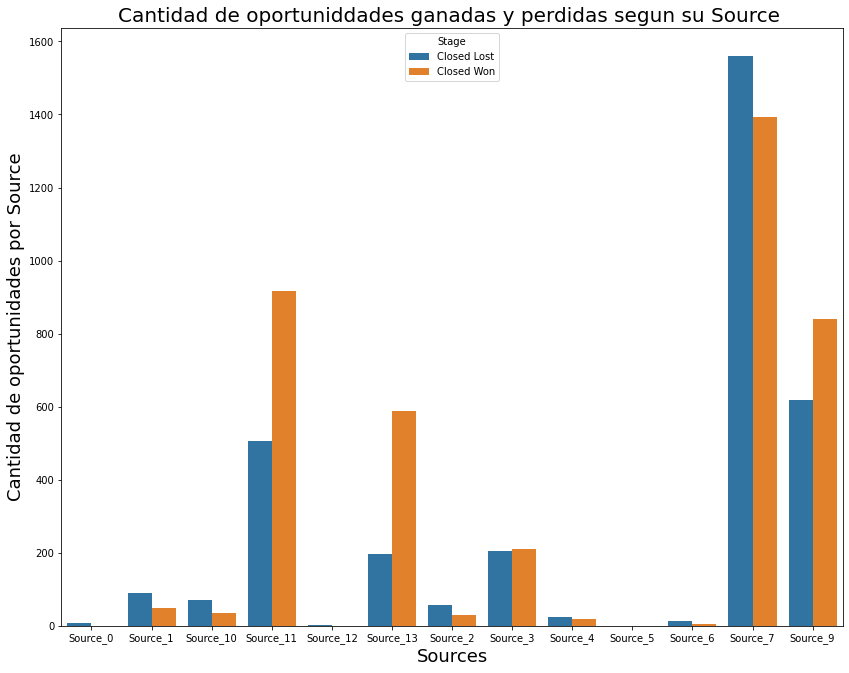

In [ ]:
fig, ax = plt.subplots(figsize=(14,11))
df_graph= df_source
g = sns.barplot(x=df_graph['Source '], y=df_graph['cant'], hue='Stage',data=df_graph,ax=ax)
g.set_title("Cantidad de oportuniddades ganadas y perdidas segun su Source ", fontsize=20)
g.set_xlabel("Sources", fontsize=18)
g.set_ylabel("Cantidad de oportunidades por Source", fontsize=18)

In [ ]:
df_account_types = df[["Account_Type", "Opportunity_Name", "Stage"]]
index_names = df_account_types[df_account_types['Account_Type'] == 'None' ].index
df_account_types = df_account_types.drop(index_names)
df_account_types = df_account_types.groupby(['Account_Type']).filter(lambda x: x['Account_Type'].count() > 200)
df_account_types = df_account_types.groupby(['Account_Type', 'Opportunity_Name', 'Stage']).agg(Cantid=("Stage", "count")).reset_index()
df_account_types = df_account_types.drop(['Cantid'], axis=1)
df_account_types["Cantidad"] = 1
df_account_types

,Account_Type,Opportunity_Name,Stage,Cantidad
0,Account_Type_0,Opportunity_Name_0,Closed Lost,1
1,Account_Type_0,Opportunity_Name_10026,Closed Lost,1
2,Account_Type_0,Opportunity_Name_10035,Closed Lost,1
3,Account_Type_0,Opportunity_Name_10055,Closed Won,1
4,Account_Type_0,Opportunity_Name_10103,Closed Won,1
...,...,...,...,...
9534,Account_Type_5,Opportunity_Name_9913,Closed Lost,1
9535,Account_Type_5,Opportunity_Name_9914,Closed Lost,1
9536,Account_Type_5,Opportunity_Name_9915,Closed Lost,1
9537,Account_Type_5,Opportunity_Name_992,Closed Won,1


In [ ]:
df_graph = df_account_types.groupby(['Account_Type', 'Stage']).agg(Tot=('Cantidad', 'count'))
df_graph = df_graph.reset_index()
df_graph

,Account_Type,Stage,Tot
0,Account_Type_0,Closed Lost,1086
1,Account_Type_0,Closed Won,2332
2,Account_Type_2,Closed Lost,2394
3,Account_Type_2,Closed Won,2282
4,Account_Type_5,Closed Lost,1013
5,Account_Type_5,Closed Won,432


Text(0, 0.5, 'Cantidad de oportunidades')

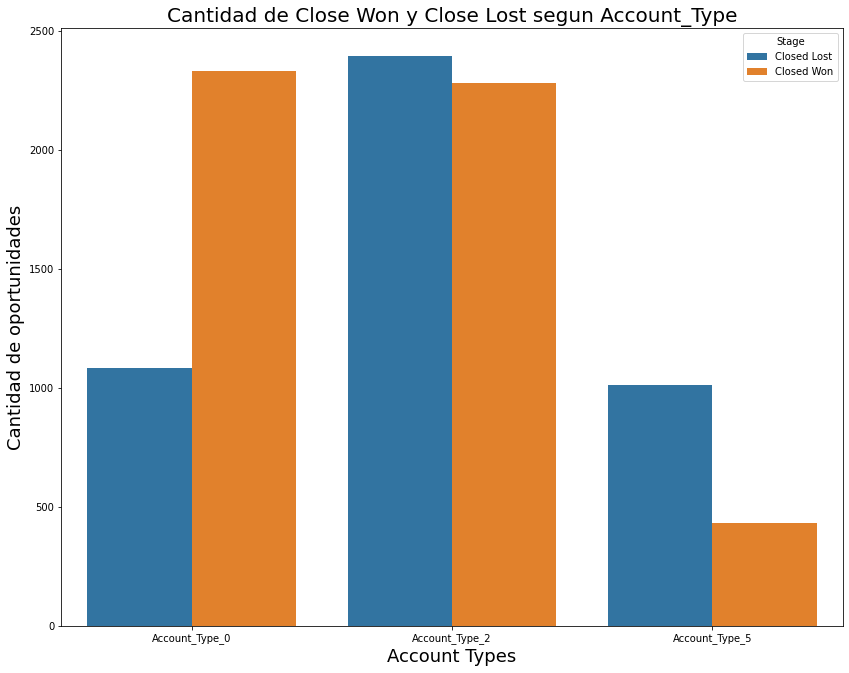

In [84]:
fig, ax = plt.subplots(figsize=(14,11))
g = sns.barplot(x=df_graph['Account_Type'], y=df_graph['Tot'], hue='Stage',data=df_graph,ax=ax)
g.set_title("Cantidad de Close Won y Close Lost segun Account_Type", fontsize=20)
g.set_xlabel("Account Types", fontsize=18)
g.set_ylabel("Cantidad de oportunidades", fontsize=18)

In [147]:
df_op_type = df[['Opportunity_Type', 'Stage', 'Opportunity_Name']]
df_op_type = df_op_type.groupby(['Opportunity_Type']).filter(lambda x: x['Opportunity_Type'].count() > 500)
df_op_type = df_op_type.groupby(['Opportunity_Type', 'Opportunity_Name', 'Stage']).agg(Cantid=('Stage', 'count')).reset_index()
df_op_type = df_op_type.drop(['Cantid'], axis=1)
df_op_type["Cantidad"] = 1
df_op_type = df_op_type[['Opportunity_Type', 'Stage', 'Cantidad']]
df_op_type

,Opportunity_Type,Stage,Cantidad
0,Opportunity_Type_1,Closed Won,1
1,Opportunity_Type_1,Closed Lost,1
2,Opportunity_Type_1,Closed Won,1
3,Opportunity_Type_1,Closed Lost,1
4,Opportunity_Type_1,Closed Lost,1
...,...,...,...
9130,Opportunity_Type_8,Closed Won,1
9131,Opportunity_Type_8,Closed Won,1
9132,Opportunity_Type_8,Closed Won,1
9133,Opportunity_Type_8,Closed Won,1


In [153]:
df_graph = df_op_type.groupby(['Opportunity_Type', 'Stage']).agg(Tot=('Cantidad', 'sum'))
df_graph = df_graph.reset_index()
pivoted = df_graph.pivot(index = 'Opportunity_Type', columns = 'Stage', values = 'Tot')
pivoted = pivoted.reset_index()
pivoted

Stage,Opportunity_Type,Closed Lost,Closed Won
0,Opportunity_Type_1,2460,2668
1,Opportunity_Type_19,1075,202
2,Opportunity_Type_7,622,1373
3,Opportunity_Type_8,219,516


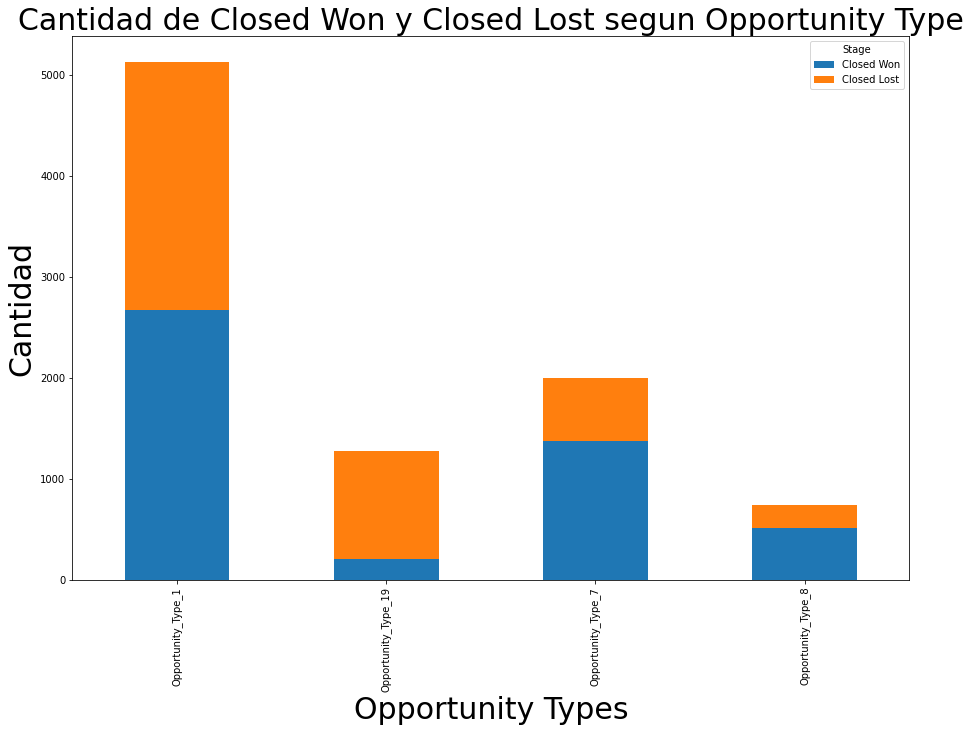

In [155]:
ax = pivoted.plot(stacked=True, kind='bar', y=['Closed Won', 'Closed Lost'], x='Opportunity_Type', figsize=(15,10))
ax.set_title("Cantidad de Closed Won y Closed Lost segun Opportunity Type", fontsize=30)
ax.set_xlabel("Opportunity Types",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30) 
plt.show()